## Building basic chatbot with langgraph (Graph API)

In [4]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

In [ ]:
class State(TypedDict):
    # Messages have the type list. The 'add message' function
    # in the annotation defines how this state key shold be updated
    # (in this case, it appends messages to the list, rather than overwritting them)
    
    messages: Annotated[list,add_messages]
    


In [8]:
import os
from dotenv import load_dotenv
load_dotenv()

True

In [20]:
from langchain_groq import ChatGroq
from langchain.chat_models import init_chat_model

llm = ChatGroq(model="llama3-8b-8192")

In [21]:
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x0000029A68CF7710>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x0000029A6945E4E0>, model_name='llama3-8b-8192', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [22]:
llm = init_chat_model("groq:llama3-8b-8192")
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x0000029A6945FD70>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x0000029A6945F4A0>, model_name='llama3-8b-8192', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [23]:
## node

def chatbot(state:State):
    return {"messages": [llm.invoke(state["messages"])]}

In [24]:
graph_builder = StateGraph(State)

## adding node
graph_builder.add_node("chatllm",chatbot)

## adding edge
graph_builder.add_edge(START, "chatllm")
graph_builder.add_edge("chatllm", END)

## compile the graph compilation is necessary
graph = graph_builder.compile()


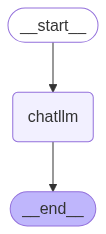

In [25]:
## visualize the graph
from IPython.display import Image,display
try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    pass

In [26]:
response = graph.invoke({"messages":"Hello"})

In [29]:
response["messages"][-1].content

"Hello! It's nice to meet you. Is there something I can help you with, or would you like to chat?"